# Variational Autoencoder with Bayesian Weights

<div class="alert alert-info">
<p>In this notebook we experiment with a hybrid architecture between a bayesian neural network and a variational autoencoder.</p>

<p>In the forward pass we sample weights from the variational distribution and obtain latent paramters (mu, sigma) for every weight sample. These are then averaged over the weights samples.</p>

<p>In the next step we draw samples from the latent distribution as well as from the variational one, so that we can decode each latent sample with an individual weight sample.</p>
</div>

In [1]:
import numpy as np
import time
import gc

In [2]:
from models.bayesian_vae import BayesianVAE

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# 32

In [4]:
VA = BayesianVAE(name='bvae_128_64_2',
                 n_inputs=784,
                 n_neurons_encoder = [128, 64],
                 n_latent=2,
                 n_neurons_decoder = [64, 128])

VA.learn(epochs=50, learning_rate=0.001)
VA.benchmark()

784 128
128 64
65 2
2 64
64 128
128 784
(?, ?, 784)
(?, 785, 128)
(?, ?, 128)
(?, 129, 64)
   [60.9] Epoch: 01 | NELBO: 12568050.545455 | ELL: -228.400534 | KL: 6021.204403 | Val. ELL: -198.710589
   [61.7] Epoch: 02 | NELBO: 10740864.731935 | ELL: -195.286091 | KL: 129.745579 | Val. ELL: -191.178578
   [61.7] Epoch: 03 | NELBO: 10344452.268065 | ELL: -188.079069 | KL: 103.482985 | Val. ELL: -184.300984
   [61.4] Epoch: 04 | NELBO: 9982264.340326 | ELL: -181.493383 | KL: 128.291354 | Val. ELL: -177.995801


KeyboardInterrupt: 

# 128x64x2x64x128

In [10]:
VA = BayesianVAE(name='bvae_128_64_2',
                 n_inputs=784,
                 n_neurons_encoder = [128, 64],
                 n_latent=2,
                 n_neurons_decoder = [64, 128])

VA.learn(epochs=50, learning_rate=0.001)
VA.benchmark()

   [63.5] Epoch: 01 | NELBO: 12554702.547786 | ELL: -228.159321 | KL: 5939.893528 | Val. ELL: -198.259113
   [65.3] Epoch: 02 | NELBO: 10719935.510490 | ELL: -194.905736 | KL: 120.052113 | Val. ELL: -192.187634
   [67.8] Epoch: 03 | NELBO: 10358975.505828 | ELL: -188.343271 | KL: 95.565313 | Val. ELL: -184.174335
   [64.3] Epoch: 04 | NELBO: 9987925.062937 | ELL: -181.596461 | KL: 119.721146 | Val. ELL: -178.783041
   [63.8] Epoch: 05 | NELBO: 9695424.510490 | ELL: -176.277825 | KL: 144.155733 | Val. ELL: -174.077136
   [65.3] Epoch: 06 | NELBO: 9503846.706294 | ELL: -172.794264 | KL: 162.199738 | Val. ELL: -169.929917
   [64.4] Epoch: 07 | NELBO: 9320567.312354 | ELL: -169.461556 | KL: 181.735239 | Val. ELL: -166.812141
   [65.1] Epoch: 08 | NELBO: 9164941.820513 | ELL: -166.631719 | KL: 197.252107 | Val. ELL: -164.223387
   [65.1] Epoch: 09 | NELBO: 9005883.314685 | ELL: -163.739471 | KL: 212.407897 | Val. ELL: -161.633499
   [66.1] Epoch: 10 | NELBO: 8870141.357809 | ELL: -161.27124

-138.14534153082437

In [12]:
VA.benchmark(noisy=True)

-152.04759920560397

In [13]:
VA.serialize('DUMPS/bvae/bvae_128_64_2/model.ckpt')

Model saved in file: DUMPS/bvae/bvae_128_64_2/model.ckpt


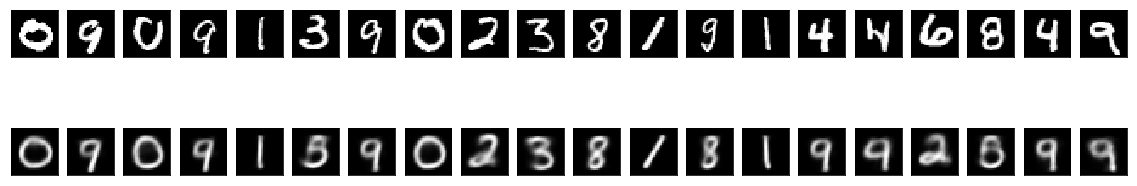

In [6]:
VA.plot_enc_dec(20, save=True)

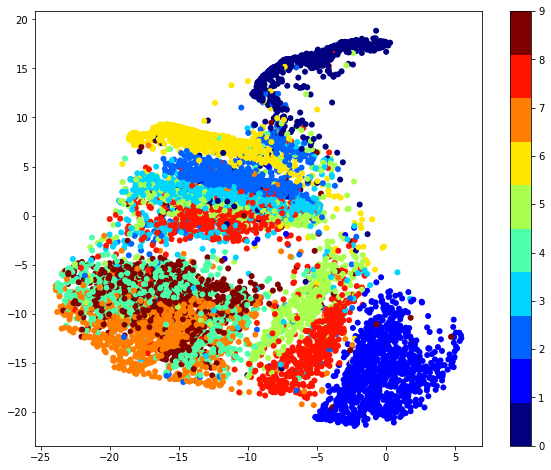

In [8]:
VA.plot_latent_repr()

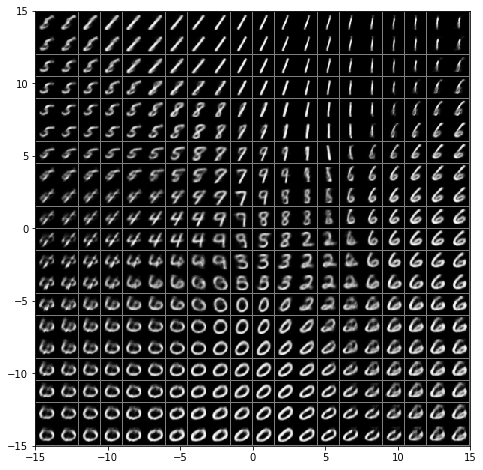

In [10]:
VA.plot_latent_recon(l_min=-15, l_max=15, save=True)

In [11]:
VA.serialize('DUMPS/bvae_simple/model.ckpt')

Model saved in file: DUMPS/bvae_simple/model.ckpt


In [3]:
VA = BayesianVAE(name='bvae_128_64_2',
                 n_inputs=784,
                 n_neurons_encoder = [128, 64],
                 n_latent=2,
                 n_neurons_decoder = [64, 128])
VA.restore('DUMPS/bvae_simple/model.ckpt')

INFO:tensorflow:Restoring parameters from DUMPS/bvae_simple/model.ckpt


In [4]:
VA = BayesianVAE(name='bvae_128_64_2_advanced',
                 n_inputs=784,
                 n_neurons_encoder = [128, 64],
                 n_latent=2,
                 n_neurons_decoder = [64, 128])

VA.learn(epochs=30, learning_rate=0.001)

   [28.3] Epoch: 01 | NELBO: 12637016.386946 | ELL: -229.655426 | KL: 5967.985530 | Val. ELL: -202.261890
   [30.0] Epoch: 02 | NELBO: 10795627.438228 | ELL: -196.281905 | KL: 122.679710 | Val. ELL: -193.354281
   [32.5] Epoch: 03 | NELBO: 10450858.209790 | ELL: -190.014015 | KL: 87.377509 | Val. ELL: -186.298996
   [32.7] Epoch: 04 | NELBO: 10058947.937063 | ELL: -182.887946 | KL: 110.900086 | Val. ELL: -179.121739
   [32.1] Epoch: 05 | NELBO: 9738139.585082 | ELL: -177.054602 | KL: 136.486035 | Val. ELL: -174.396446
   [31.3] Epoch: 06 | NELBO: 9514032.100233 | ELL: -172.979496 | KL: 159.820998 | Val. ELL: -170.292535
   [31.7] Epoch: 07 | NELBO: 9330987.289044 | ELL: -169.651150 | KL: 174.095457 | Val. ELL: -167.176650
   [35.0] Epoch: 08 | NELBO: 9155157.306527 | ELL: -166.453892 | KL: 193.251240 | Val. ELL: -163.924613
   [33.6] Epoch: 09 | NELBO: 8997715.699301 | ELL: -163.591050 | KL: 207.974184 | Val. ELL: -161.523417
   [31.3] Epoch: 10 | NELBO: 8891260.270396 | ELL: -161.6553

In [5]:
VA.benchmark()

-139.74644108307666

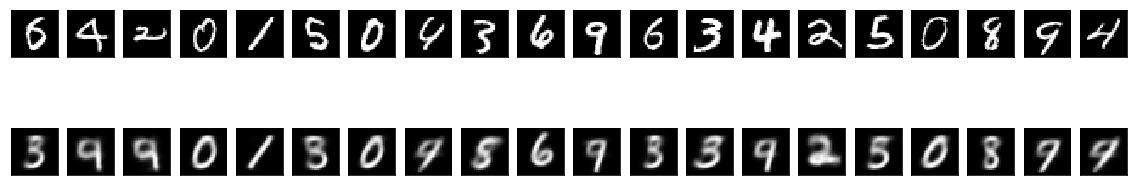

In [8]:
VA.plot_enc_dec(20, save=True)

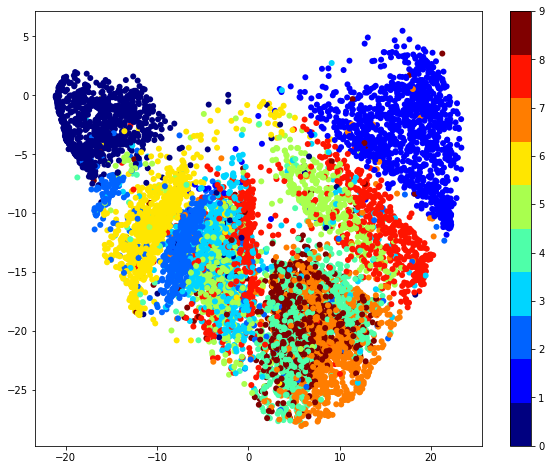

In [6]:
VA.plot_latent_repr(save=True)

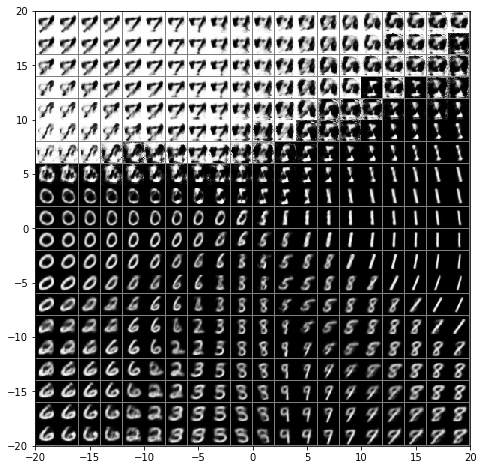

In [6]:
VA.plot_latent_recon(l_min=-20, l_max=20, save=True)

In [10]:
VA.serialize('DUMPS/bvae_advanced/model.ckpt')

Model saved in file: DUMPS/bvae_advanced/model.ckpt


In [3]:
VA = BayesianVAE(name='bvae_128_64_2_advanced',
                 n_inputs=784,
                 n_neurons_encoder = [128, 64],
                 n_latent=2,
                 n_neurons_decoder = [64, 128])

In [4]:
VA.restore('DUMPS/bvae_advanced/model.ckpt')

INFO:tensorflow:Restoring parameters from DUMPS/bvae_advanced/model.ckpt
